In [2]:
import json, pandas as pd
import json


In [26]:
with open('skp/sample.json') as f:
    js = json.loads(f.read())
df = pd.DataFrame(js)
df.drop(['data_idx', 'id', 'parent_cate', 'src_uv', 'coverage'], axis=1, inplace=True)
df.head()

,cate,mosu,uv,match_count
0,자동차용품/차량용품,186287,309983,8275
1,소형차,186287,463993,12308
2,중형차,186287,26524,504
3,대형차,186287,31448,834
4,블랙박스,186287,34911,1053


In [52]:
# get jaccard similarity
# jaccard = match_count / (mosu + uv - match_count)
# 0.0169571409543131 = 8275 / (186287 + 309983 - 8275)
df['jaccard'] = df['match_count'] / (df['mosu'] + df['uv'] - df['match_count'])
df.head()


,cate,mosu,uv,match_count,jaccard
0,자동차용품/차량용품,186287,309983,8275,0.016957
1,소형차,186287,463993,12308,0.019292
2,중형차,186287,26524,504,0.002374
3,대형차,186287,31448,834,0.003845
4,블랙박스,186287,34911,1053,0.004783


In [53]:
# jaccard 높은 순으로 정렬
df.sort_values(by='jaccard', ascending=False, inplace=True)
df.head()

,cate,mosu,uv,match_count,jaccard
112,카페/디저트/베이커리 상품권,186287,276085,11861,0.026328
115,패스트푸드 상품권,186287,331814,12967,0.025670
11,여성화장품,186287,495122,16365,0.024607
54,농수축산물,186287,797526,23318,0.024277
8,스킨케어,186287,397932,13724,0.024056


In [44]:
# make chart
import matplotlib.pyplot as plt
import seaborn as sns



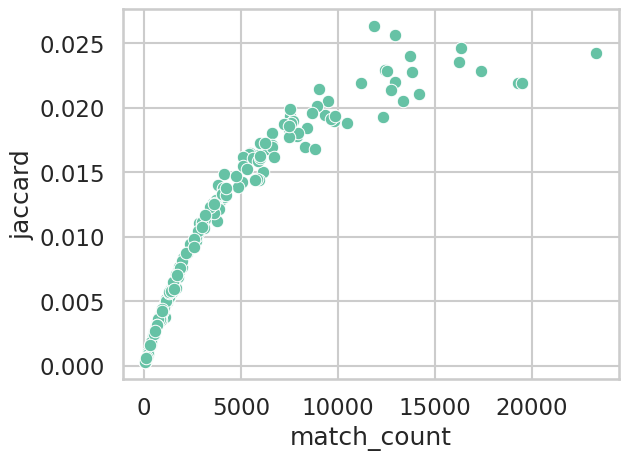

In [45]:
# y: jaccard x: match_count
sns.scatterplot(x='match_count', y='jaccard', data=df)
plt.show()

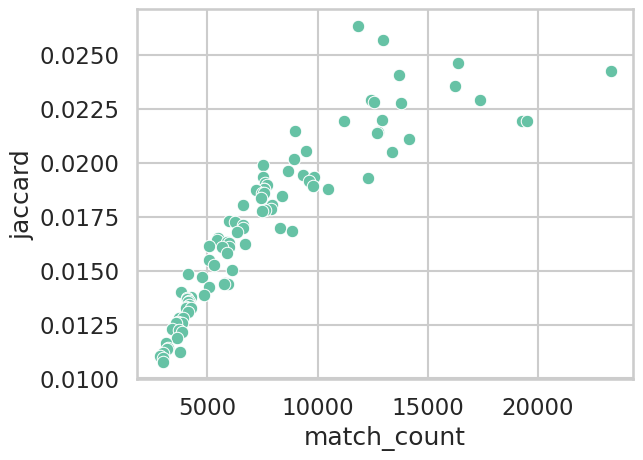

In [49]:
# jaccard 상위 100개만 보기
sns.scatterplot(x='match_count', y='jaccard', data=df.sort_values(by='jaccard', ascending=False).head(100))
plt.show()

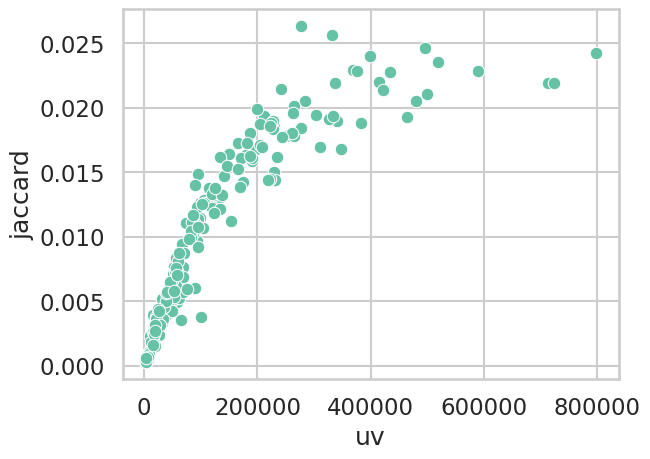

In [47]:
# y: jaccard x: uv
sns.scatterplot(x='uv', y='jaccard', data=df)
plt.show()

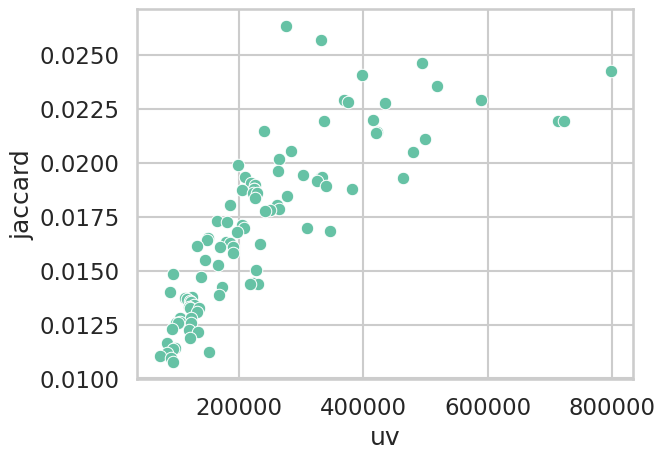

In [50]:
# jaccard 상위 100개만 보기
sns.scatterplot(x='uv', y='jaccard', data=df.sort_values(by='jaccard', ascending=False).head(100))
plt.show()